# Preamble

In [2]:
import sys
#sys.path.insert(0, dir_notebook)

from my_units import *
from functions_model import * 
from functions_load import *
from functions_yellin import *

i_mock = 6 # mock file number

In [3]:
dir_home = '/mnt/home/kvantilburg/'
dir_ceph = dir_home+'ceph/luminous-basin/'
dir_events = dir_ceph+'mocks/event_lists/'
dir_source = dir_ceph+'data/products_80610202001_orbit1_chu12_spatialARF/'
dir_production = dir_ceph+'data/production/'
dir_res = dir_ceph+'results/mocks/mock_'+str(i_mock)+'/'

# Load Results

In [5]:
list_files_rho0 = np.sort([dir_res+'proj/'+file for file in listdir(dir_res+'proj/') if file[0:4]=='rho0'])
list_files_proj = np.sort([dir_res+'proj/'+file for file in listdir(dir_res+'proj/') if file[0:4]=='proj'])

In [7]:
df_yellin = pd.read_csv(dir_res+'N_sig_lim_k10_'+str(i_mock)+'_fid.csv').sort_values(by='m',ignore_index=True)
df_yellin.sort_values(by='m',inplace=True,ignore_index=True)
df_results = pd.DataFrame(columns=['m','ra_sun_0','dec_sun_0','rho_0','N_data',
                                   'N_sig_lim_poisson','S_0_lim_poisson'])
for i,file in enumerate(tqdm(list_files_rho0[:])):
    df_tmp1 = pd.read_csv(file)
    N_data = len(pd.read_csv(list_files_proj[i]))
    N_sig_lim = poisson_limit(N_data)
    S_0_lim = N_sig_lim/df_tmp1['rho_0'][0]
    df_tmp1.insert(0,'N_data',N_data)
    df_tmp1.insert(0,'N_sig_lim_poisson',N_sig_lim)
    df_tmp1.insert(0,'S_0_lim_poisson',S_0_lim)
    df_results = pd.concat([df_results,df_tmp1],ignore_index=True)
df_results.sort_values(by='m',inplace=True,ignore_index=True)
df_results = pd.concat([df_results,df_yellin['N_sig_lim_yellin']],axis=1)
df_results.insert(loc=8,column='S_0_lim_yellin',value=df_results['N_sig_lim_yellin']/df_results['rho_0'])

100%|██████████| 349/349 [00:25<00:00, 13.89it/s]


In [8]:
df_results

,m,ra_sun_0,dec_sun_0,rho_0,N_data,N_sig_lim_poisson,S_0_lim_poisson,N_sig_lim_yellin,S_0_lim_yellin
0,5.1,2.978728,0.070178,46.075331,10396,10526.408574,228.460835,6766.408024,146.855332
1,5.2,2.978728,0.070178,131.077967,9540,9665.845575,73.741192,6704.554590,51.149364
2,5.3,2.978728,0.070178,305.565489,8666,8786.166682,28.753793,6213.480164,20.334365
3,5.4,2.978728,0.070178,628.920575,6729,6835.312074,10.868323,4326.577196,6.879370
4,5.5,2.978728,0.070178,1205.907263,5960,6059.514435,5.024859,2752.752548,2.282723
...,...,...,...,...,...,...,...,...,...
344,39.5,2.978728,0.070178,25233.482328,10,15.406070,0.000611,2.570988,0.000102
345,39.6,2.978728,0.070178,25148.565663,10,15.406070,0.000613,2.570988,0.000102
346,39.7,2.978728,0.070178,25060.846940,11,16.596335,0.000662,2.686581,0.000107
347,39.8,2.978728,0.070178,24931.713987,10,15.406070,0.000618,2.570988,0.000103


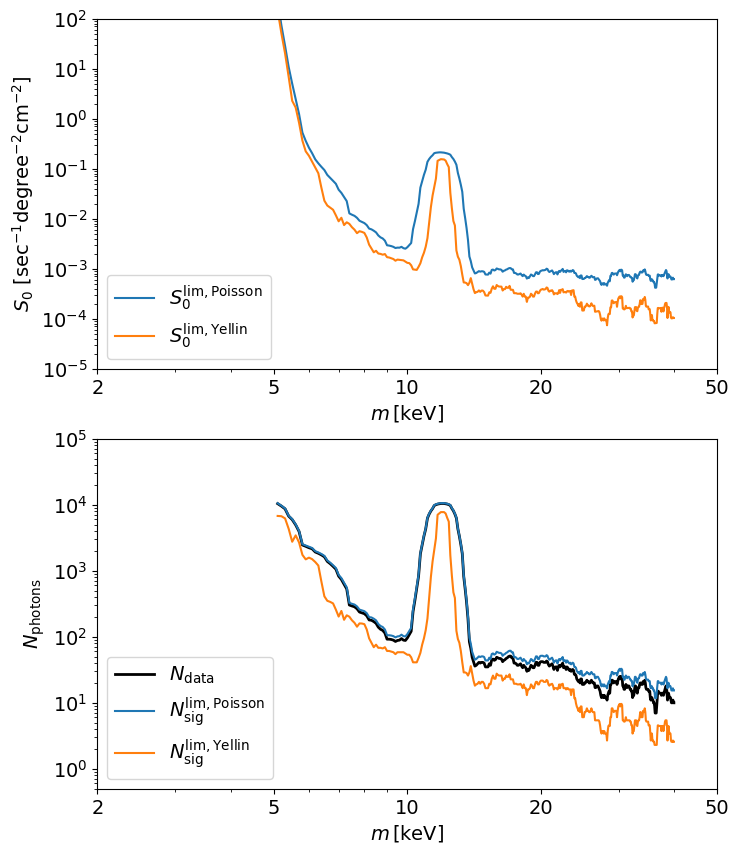

In [9]:
fig,ax = plt.subplots(2,1,figsize=(8,10))
ax[0].plot(df_results['m'],df_results['S_0_lim_poisson'],label=r'$S_0^\mathrm{lim,Poisson}$')
ax[0].plot(df_results['m'],df_results['S_0_lim_yellin'],label=r'$S_0^\mathrm{lim,Yellin}$')
ax[0].set_xlim(2,50); ax[0].set_ylim(1e-5,1e2);
ax[0].set_xscale('log'); ax[0].set_yscale('log'); ax[0].set_xlabel(r'$m \, [\mathrm{keV}]$'); ax[0].set_ylabel(r'$S_0~\mathrm{[sec^{-1} degree^{-2} cm^{-2}]}$'); 
ax[0].legend(loc='lower left');
ax[0].set_xticks([2,5,10,20,50],minor=False)
ax[0].set_xticklabels([2,5,10,20,50]);
ax[1].plot(df_results['m'],df_results['N_data'],lw=2,color='black',label=r'$N_\mathrm{data}$')
ax[1].plot(df_results['m'],df_results['N_sig_lim_poisson'],label=r'$N_\mathrm{sig}^\mathrm{lim,Poisson}$')
ax[1].plot(df_yellin['m'],df_yellin['N_sig_lim_yellin'],label=r'$N_\mathrm{sig}^\mathrm{lim,Yellin}$')
ax[1].set_xlim(2,50); ax[1].set_ylim(5e-1,1e5);
ax[1].set_xscale('log'); ax[1].set_yscale('log'); ax[1].set_xlabel(r'$m \, [\mathrm{keV}]$'); ax[1].set_ylabel(r'$N_\mathrm{photons}$'); 
ax[1].legend(loc='lower left');
ax[1].set_xticks([2,5,10,20,50],minor=False)
ax[1].set_xticklabels([2,5,10,20,50]);

In [12]:
file_results = dir_res+'results_k10_'+str(i_mock)+'_fid.csv'
with open(file_results,'w') as f: #open data file, in 'write mode'
    df_results.to_csv(f, header=f.tell()==0, index=False)